[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/08_1_Regularization_Regression.ipynb)

# Effect of Regularization Compare by Using Regression Cases

## Data Visualization and Preprocessing

In [1]:
!wget https://raw.githubusercontent.com/redcican/Master-Thesis/master/Regression_mid.csv

--2018-06-19 11:13:07--  https://raw.githubusercontent.com/redcican/Master-Thesis/master/Regression_mid.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1653820 (1.6M) [text/plain]
Saving to: ‘Regression_mid.csv’

Regression_mid.csv  100%[===================>]   1.58M  8.58MB/s    in 0.2s    

2018-06-19 11:13:07 (8.58 MB/s) - ‘Regression_mid.csv’ saved [1653820/1653820]



In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from keras.models import Sequential
from keras.layers import Dense, regularizers
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [4]:
rawdf = pd.read_csv('Regression_mid.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,D
0,41.652,24.739,21.857,45.095,36.583,27.420,41.849,29.251,24.4270,39.156,31.525,29.661,22.298,37.114,31.930,122.46
1,26.007,23.648,37.083,21.532,36.033,25.703,38.035,33.229,9.0067,22.466,44.577,13.691,26.670,33.056,30.683,107.44
2,26.297,33.818,21.227,48.211,35.864,39.852,33.195,51.299,36.9970,37.245,37.786,51.839,33.949,46.883,36.635,120.03
3,34.610,14.372,31.512,26.721,22.922,38.254,39.524,33.275,42.9710,20.904,40.671,22.071,17.671,25.432,19.461,109.05
4,37.274,19.442,19.182,48.360,46.518,32.365,27.234,16.937,26.1260,24.334,34.613,39.486,33.299,22.766,34.507,115.82


In [0]:
df = rawdf.copy()

#feature scale
ss = MinMaxScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','D']
                  
df[scale_features] = ss.fit_transform(df[scale_features])

In [6]:
df.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,D
0,0.633399,0.420534,0.405178,0.687349,0.609785,0.502013,0.669150,0.466403,0.419420,0.621642,0.533036,0.511251,0.354611,0.560121,0.565076,0.645123
1,0.438487,0.406252,0.595786,0.379802,0.602625,0.480607,0.621319,0.515165,0.233879,0.395921,0.699903,0.319281,0.413335,0.509026,0.550695,0.484718
2,0.442100,0.539386,0.397291,0.728020,0.600424,0.657005,0.560622,0.736664,0.570665,0.595797,0.613081,0.777846,0.511106,0.683122,0.619335,0.619172
3,0.545667,0.284821,0.526045,0.447530,0.431939,0.637082,0.639992,0.515729,0.642546,0.374795,0.649965,0.420014,0.292462,0.413033,0.421281,0.501912
4,0.578856,0.351192,0.371690,0.729965,0.739123,0.563663,0.485867,0.315460,0.439863,0.421184,0.572515,0.629354,0.502375,0.379465,0.594794,0.574211


In [7]:
X = df.drop(['D'],axis=1).values
y = (df['D'].values).reshape(-1,1)

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12000, 15) (12000, 1) (3000, 15) (3000, 1)


## 1 .Deep Neural Networks for Regression using different stategies of Regularization

In [0]:
def model(reg):
  model = Sequential()
  model.add(Dense(32, input_shape=(X.shape[1],),activation='relu',kernel_regularizer=reg))
  model.add(Dense(64, activation='relu',kernel_regularizer=reg))
  model.add(Dense(32, activation='relu',kernel_regularizer=reg))
  model.add(Dense(8, activation='relu',kernel_regularizer=reg))
  model.add(Dense(1))
  model.compile('rmsprop','mse',metrics=['mae'])
  return model

### 1.1 Without any Regularization $\lambda=0$


In [12]:
reg_1 = regularizers.l2(0)
model_1 = model(reg_1)
model_1.history = model_1.fit(X_train,y_train,epochs=300,verbose=2,validation_split=0.2)

Train on 9600 samples, validate on 2400 samples
Epoch 1/300
 - 1s - loss: 0.0161 - mean_absolute_error: 0.0772 - val_loss: 0.0030 - val_mean_absolute_error: 0.0447
Epoch 2/300
 - 1s - loss: 0.0034 - mean_absolute_error: 0.0475 - val_loss: 0.0016 - val_mean_absolute_error: 0.0325
Epoch 3/300
 - 1s - loss: 0.0031 - mean_absolute_error: 0.0463 - val_loss: 0.0032 - val_mean_absolute_error: 0.0519
Epoch 4/300
 - 1s - loss: 0.0030 - mean_absolute_error: 0.0469 - val_loss: 5.0765e-04 - val_mean_absolute_error: 0.0179
Epoch 5/300
 - 1s - loss: 0.0034 - mean_absolute_error: 0.0506 - val_loss: 0.0017 - val_mean_absolute_error: 0.0359
Epoch 6/300
 - 1s - loss: 0.0041 - mean_absolute_error: 0.0571 - val_loss: 0.0020 - val_mean_absolute_error: 0.0391
Epoch 7/300
 - 1s - loss: 0.0043 - mean_absolute_error: 0.0570 - val_loss: 0.0040 - val_mean_absolute_error: 0.0592
Epoch 8/300
 - 1s - loss: 0.0040 - mean_absolute_error: 0.0547 - val_loss: 0.0060 - val_mean_absolute_error: 0.0746
Epoch 9/300
 - 1s - 

 - 0s - loss: 0.0011 - mean_absolute_error: 0.0298 - val_loss: 2.6586e-04 - val_mean_absolute_error: 0.0136
Epoch 30/300
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0282 - val_loss: 9.7979e-04 - val_mean_absolute_error: 0.0298
Epoch 31/300
 - 1s - loss: 0.0011 - mean_absolute_error: 0.0295 - val_loss: 4.7448e-04 - val_mean_absolute_error: 0.0194
Epoch 32/300
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0290 - val_loss: 0.0016 - val_mean_absolute_error: 0.0381
Epoch 33/300
 - 0s - loss: 9.8495e-04 - mean_absolute_error: 0.0282 - val_loss: 0.0021 - val_mean_absolute_error: 0.0437
Epoch 34/300
 - 0s - loss: 9.4258e-04 - mean_absolute_error: 0.0275 - val_loss: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 35/300
 - 0s - loss: 9.0697e-04 - mean_absolute_error: 0.0274 - val_loss: 2.0548e-04 - val_mean_absolute_error: 0.0123
Epoch 36/300
 - 0s - loss: 8.7365e-04 - mean_absolute_error: 0.0265 - val_loss: 9.6794e-04 - val_mean_absolute_error: 0.0300
Epoch 37/300
 - 0s - loss: 8.7008e-04 - m

 - 0s - loss: 7.7735e-04 - mean_absolute_error: 0.0260 - val_loss: 0.0015 - val_mean_absolute_error: 0.0378
Epoch 58/300
 - 0s - loss: 7.8612e-04 - mean_absolute_error: 0.0258 - val_loss: 3.3903e-04 - val_mean_absolute_error: 0.0171
Epoch 59/300
 - 0s - loss: 7.8682e-04 - mean_absolute_error: 0.0251 - val_loss: 0.0011 - val_mean_absolute_error: 0.0325
Epoch 60/300
 - 0s - loss: 7.8339e-04 - mean_absolute_error: 0.0252 - val_loss: 3.6870e-04 - val_mean_absolute_error: 0.0179
Epoch 61/300
 - 0s - loss: 7.9723e-04 - mean_absolute_error: 0.0261 - val_loss: 0.0016 - val_mean_absolute_error: 0.0385
Epoch 62/300
 - 0s - loss: 7.7860e-04 - mean_absolute_error: 0.0261 - val_loss: 4.3773e-04 - val_mean_absolute_error: 0.0196
Epoch 63/300
 - 0s - loss: 7.8256e-04 - mean_absolute_error: 0.0257 - val_loss: 6.7582e-04 - val_mean_absolute_error: 0.0247
Epoch 64/300
 - 0s - loss: 7.8487e-04 - mean_absolute_error: 0.0265 - val_loss: 0.0012 - val_mean_absolute_error: 0.0330
Epoch 65/300
 - 0s - loss: 7.

Epoch 85/300
 - 0s - loss: 7.5499e-04 - mean_absolute_error: 0.0257 - val_loss: 6.4844e-04 - val_mean_absolute_error: 0.0246
Epoch 86/300
 - 0s - loss: 7.6338e-04 - mean_absolute_error: 0.0259 - val_loss: 0.0010 - val_mean_absolute_error: 0.0315
Epoch 87/300
 - 0s - loss: 7.6459e-04 - mean_absolute_error: 0.0254 - val_loss: 8.4875e-04 - val_mean_absolute_error: 0.0284
Epoch 88/300
 - 0s - loss: 7.7689e-04 - mean_absolute_error: 0.0253 - val_loss: 5.0762e-04 - val_mean_absolute_error: 0.0212
Epoch 89/300
 - 0s - loss: 7.8259e-04 - mean_absolute_error: 0.0257 - val_loss: 0.0010 - val_mean_absolute_error: 0.0311
Epoch 90/300
 - 0s - loss: 8.1079e-04 - mean_absolute_error: 0.0253 - val_loss: 6.5607e-04 - val_mean_absolute_error: 0.0245
Epoch 91/300
 - 0s - loss: 7.6772e-04 - mean_absolute_error: 0.0255 - val_loss: 4.9680e-04 - val_mean_absolute_error: 0.0210
Epoch 92/300
 - 0s - loss: 7.8086e-04 - mean_absolute_error: 0.0265 - val_loss: 0.0013 - val_mean_absolute_error: 0.0342
Epoch 93/300

Epoch 113/300
 - 0s - loss: 0.0014 - mean_absolute_error: 0.0329 - val_loss: 2.6770e-04 - val_mean_absolute_error: 0.0152
Epoch 114/300
 - 1s - loss: 8.8706e-04 - mean_absolute_error: 0.0260 - val_loss: 0.0025 - val_mean_absolute_error: 0.0489
Epoch 115/300
 - 0s - loss: 8.5922e-04 - mean_absolute_error: 0.0268 - val_loss: 5.9280e-04 - val_mean_absolute_error: 0.0230
Epoch 116/300
 - 0s - loss: 8.0658e-04 - mean_absolute_error: 0.0262 - val_loss: 0.0012 - val_mean_absolute_error: 0.0337
Epoch 117/300
 - 0s - loss: 8.0579e-04 - mean_absolute_error: 0.0266 - val_loss: 0.0012 - val_mean_absolute_error: 0.0339
Epoch 118/300
 - 1s - loss: 7.9552e-04 - mean_absolute_error: 0.0261 - val_loss: 9.1033e-04 - val_mean_absolute_error: 0.0289
Epoch 119/300
 - 1s - loss: 8.0968e-04 - mean_absolute_error: 0.0264 - val_loss: 5.2702e-04 - val_mean_absolute_error: 0.0216
Epoch 120/300
 - 1s - loss: 8.5089e-04 - mean_absolute_error: 0.0259 - val_loss: 9.1717e-04 - val_mean_absolute_error: 0.0295
Epoch 12

Epoch 141/300
 - 0s - loss: 8.2121e-04 - mean_absolute_error: 0.0267 - val_loss: 5.5826e-04 - val_mean_absolute_error: 0.0225
Epoch 142/300
 - 0s - loss: 8.2128e-04 - mean_absolute_error: 0.0267 - val_loss: 8.5997e-04 - val_mean_absolute_error: 0.0285
Epoch 143/300
 - 0s - loss: 7.9883e-04 - mean_absolute_error: 0.0263 - val_loss: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 144/300
 - 1s - loss: 8.3474e-04 - mean_absolute_error: 0.0264 - val_loss: 9.4362e-04 - val_mean_absolute_error: 0.0299
Epoch 145/300
 - 1s - loss: 8.3037e-04 - mean_absolute_error: 0.0262 - val_loss: 0.0014 - val_mean_absolute_error: 0.0356
Epoch 146/300
 - 1s - loss: 8.1472e-04 - mean_absolute_error: 0.0263 - val_loss: 0.0011 - val_mean_absolute_error: 0.0313
Epoch 147/300
 - 1s - loss: 8.3868e-04 - mean_absolute_error: 0.0262 - val_loss: 5.7263e-04 - val_mean_absolute_error: 0.0228
Epoch 148/300
 - 1s - loss: 8.3358e-04 - mean_absolute_error: 0.0249 - val_loss: 7.0747e-04 - val_mean_absolute_error: 0.0253
Epoc

Epoch 169/300
 - 0s - loss: 8.0713e-04 - mean_absolute_error: 0.0266 - val_loss: 6.0960e-04 - val_mean_absolute_error: 0.0236
Epoch 170/300
 - 0s - loss: 8.0552e-04 - mean_absolute_error: 0.0263 - val_loss: 7.5754e-04 - val_mean_absolute_error: 0.0266
Epoch 171/300
 - 0s - loss: 8.1464e-04 - mean_absolute_error: 0.0265 - val_loss: 4.8396e-04 - val_mean_absolute_error: 0.0207
Epoch 172/300
 - 0s - loss: 8.0016e-04 - mean_absolute_error: 0.0262 - val_loss: 9.1602e-04 - val_mean_absolute_error: 0.0294
Epoch 173/300
 - 0s - loss: 8.4089e-04 - mean_absolute_error: 0.0260 - val_loss: 9.8535e-04 - val_mean_absolute_error: 0.0301
Epoch 174/300
 - 0s - loss: 8.2306e-04 - mean_absolute_error: 0.0256 - val_loss: 7.8594e-04 - val_mean_absolute_error: 0.0271
Epoch 175/300
 - 0s - loss: 9.1282e-04 - mean_absolute_error: 0.0270 - val_loss: 8.9473e-04 - val_mean_absolute_error: 0.0291
Epoch 176/300
 - 0s - loss: 7.9741e-04 - mean_absolute_error: 0.0261 - val_loss: 5.8959e-04 - val_mean_absolute_error:

Epoch 197/300
 - 1s - loss: 7.6893e-04 - mean_absolute_error: 0.0252 - val_loss: 9.4643e-04 - val_mean_absolute_error: 0.0300
Epoch 198/300
 - 1s - loss: 7.7746e-04 - mean_absolute_error: 0.0258 - val_loss: 2.1181e-04 - val_mean_absolute_error: 0.0124
Epoch 199/300
 - 0s - loss: 7.5227e-04 - mean_absolute_error: 0.0247 - val_loss: 5.8622e-04 - val_mean_absolute_error: 0.0227
Epoch 200/300
 - 0s - loss: 7.7142e-04 - mean_absolute_error: 0.0256 - val_loss: 6.4467e-04 - val_mean_absolute_error: 0.0240
Epoch 201/300
 - 0s - loss: 9.3431e-04 - mean_absolute_error: 0.0248 - val_loss: 3.0560e-04 - val_mean_absolute_error: 0.0158
Epoch 202/300
 - 0s - loss: 7.5159e-04 - mean_absolute_error: 0.0251 - val_loss: 5.2938e-04 - val_mean_absolute_error: 0.0218
Epoch 203/300
 - 0s - loss: 7.6513e-04 - mean_absolute_error: 0.0258 - val_loss: 4.2823e-04 - val_mean_absolute_error: 0.0194
Epoch 204/300
 - 0s - loss: 8.5482e-04 - mean_absolute_error: 0.0246 - val_loss: 3.5278e-04 - val_mean_absolute_error:

Epoch 225/300
 - 0s - loss: 7.4236e-04 - mean_absolute_error: 0.0252 - val_loss: 4.6378e-04 - val_mean_absolute_error: 0.0203
Epoch 226/300
 - 0s - loss: 7.3430e-04 - mean_absolute_error: 0.0248 - val_loss: 7.0631e-04 - val_mean_absolute_error: 0.0256
Epoch 227/300
 - 0s - loss: 8.2989e-04 - mean_absolute_error: 0.0244 - val_loss: 7.0552e-05 - val_mean_absolute_error: 0.0058
Epoch 228/300
 - 0s - loss: 7.2407e-04 - mean_absolute_error: 0.0238 - val_loss: 2.2780e-04 - val_mean_absolute_error: 0.0132
Epoch 229/300
 - 0s - loss: 7.3504e-04 - mean_absolute_error: 0.0247 - val_loss: 5.6871e-04 - val_mean_absolute_error: 0.0228
Epoch 230/300
 - 0s - loss: 7.3346e-04 - mean_absolute_error: 0.0251 - val_loss: 9.6715e-04 - val_mean_absolute_error: 0.0303
Epoch 231/300
 - 0s - loss: 7.2395e-04 - mean_absolute_error: 0.0247 - val_loss: 1.8917e-04 - val_mean_absolute_error: 0.0116
Epoch 232/300
 - 0s - loss: 7.3423e-04 - mean_absolute_error: 0.0250 - val_loss: 6.8590e-04 - val_mean_absolute_error:

Epoch 253/300
 - 0s - loss: 7.4294e-04 - mean_absolute_error: 0.0249 - val_loss: 5.5162e-04 - val_mean_absolute_error: 0.0224
Epoch 254/300
 - 0s - loss: 7.3324e-04 - mean_absolute_error: 0.0249 - val_loss: 0.0011 - val_mean_absolute_error: 0.0322
Epoch 255/300
 - 0s - loss: 7.4339e-04 - mean_absolute_error: 0.0249 - val_loss: 0.0019 - val_mean_absolute_error: 0.0430
Epoch 256/300
 - 0s - loss: 7.3992e-04 - mean_absolute_error: 0.0249 - val_loss: 8.5055e-04 - val_mean_absolute_error: 0.0283
Epoch 257/300
 - 0s - loss: 7.4705e-04 - mean_absolute_error: 0.0253 - val_loss: 7.6526e-05 - val_mean_absolute_error: 0.0060
Epoch 258/300
 - 0s - loss: 7.4357e-04 - mean_absolute_error: 0.0252 - val_loss: 6.8800e-04 - val_mean_absolute_error: 0.0253
Epoch 259/300
 - 0s - loss: 7.2806e-04 - mean_absolute_error: 0.0245 - val_loss: 9.3344e-04 - val_mean_absolute_error: 0.0297
Epoch 260/300
 - 0s - loss: 7.5425e-04 - mean_absolute_error: 0.0253 - val_loss: 6.6332e-04 - val_mean_absolute_error: 0.0248


Epoch 281/300
 - 0s - loss: 7.3947e-04 - mean_absolute_error: 0.0254 - val_loss: 2.9697e-04 - val_mean_absolute_error: 0.0156
Epoch 282/300
 - 0s - loss: 7.2948e-04 - mean_absolute_error: 0.0246 - val_loss: 0.0013 - val_mean_absolute_error: 0.0356
Epoch 283/300
 - 0s - loss: 7.3800e-04 - mean_absolute_error: 0.0253 - val_loss: 4.6159e-04 - val_mean_absolute_error: 0.0202
Epoch 284/300
 - 0s - loss: 7.2261e-04 - mean_absolute_error: 0.0240 - val_loss: 5.6913e-04 - val_mean_absolute_error: 0.0225
Epoch 285/300
 - 0s - loss: 7.1428e-04 - mean_absolute_error: 0.0238 - val_loss: 6.1453e-04 - val_mean_absolute_error: 0.0234
Epoch 286/300
 - 1s - loss: 7.3029e-04 - mean_absolute_error: 0.0249 - val_loss: 3.5638e-04 - val_mean_absolute_error: 0.0174
Epoch 287/300
 - 0s - loss: 7.2560e-04 - mean_absolute_error: 0.0245 - val_loss: 0.0010 - val_mean_absolute_error: 0.0308
Epoch 288/300
 - 0s - loss: 7.3253e-04 - mean_absolute_error: 0.0250 - val_loss: 2.2480e-04 - val_mean_absolute_error: 0.0135


In [13]:
train_loss_1 = model_1.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_1))
test_loss_1 = model_1.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_1))

Training loss  0.00022993095859419555
Testing loss 0.00023752214356015125


In [15]:
y_pred_1 = model_1.predict(X_test)
r2_score(y_test, y_pred_1)  

0.9836037456357004

### 1.2 L2 *Regularization* $\lambda=0.1$




In [16]:
reg_2 = regularizers.l2(0.1)
model_2 = model(reg_2)
model_2.history = model_2.fit(X_train,y_train,epochs=300,verbose=2,validation_split=0.2)

Train on 9600 samples, validate on 2400 samples
Epoch 1/300
 - 1s - loss: 2.6999 - mean_absolute_error: 0.0965 - val_loss: 0.0457 - val_mean_absolute_error: 0.0929
Epoch 2/300
 - 0s - loss: 0.0167 - mean_absolute_error: 0.0940 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 3/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 4/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0139 - val_mean_absolute_error: 0.0928
Epoch 5/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0928
Epoch 6/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 7/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 8/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 9/300
 - 1s - loss

 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 30/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 31/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0140 - val_mean_absolute_error: 0.0930
Epoch 32/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 33/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0139 - val_mean_absolute_error: 0.0927
Epoch 34/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 35/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0922
Epoch 36/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 37/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0

Epoch 58/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 59/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0926
Epoch 60/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 61/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 62/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 63/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 64/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 65/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 66/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 

Epoch 87/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 88/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0139 - val_mean_absolute_error: 0.0928
Epoch 89/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 90/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 91/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 92/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 93/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0929
Epoch 94/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 95/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 

Epoch 116/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 117/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 118/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 119/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 120/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0922
Epoch 121/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 122/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 123/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 124/300
 - 1s - loss: 0.0140 - mean_absolute_error

Epoch 145/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 146/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 147/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0927
Epoch 148/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 149/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 150/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0937 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 151/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0927
Epoch 152/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 153/300
 - 1s - loss: 0.0141 - mean_absolute_error

Epoch 174/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 175/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 176/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 177/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0929
Epoch 178/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 179/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 180/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0922
Epoch 181/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 182/300
 - 0s - loss: 0.0141 - mean_absolute_error

Epoch 203/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0139 - val_mean_absolute_error: 0.0926
Epoch 204/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0926
Epoch 205/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 206/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 207/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 208/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0937 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 209/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 210/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0928
Epoch 211/300
 - 1s - loss: 0.0140 - mean_absolute_error

Epoch 232/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0926
Epoch 233/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 234/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0937 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 235/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0140 - val_mean_absolute_error: 0.0931
Epoch 236/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 237/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0926
Epoch 238/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 239/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 240/300
 - 0s - loss: 0.0140 - mean_absolute_error

Epoch 261/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 262/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 263/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 264/300
 - 0s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 265/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0927
Epoch 266/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 267/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0937 - val_loss: 0.0138 - val_mean_absolute_error: 0.0922
Epoch 268/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0925
Epoch 269/300
 - 1s - loss: 0.0140 - mean_absolute_error

Epoch 290/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0937 - val_loss: 0.0138 - val_mean_absolute_error: 0.0922
Epoch 291/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 292/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0922
Epoch 293/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0927
Epoch 294/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0940 - val_loss: 0.0138 - val_mean_absolute_error: 0.0924
Epoch 295/300
 - 1s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 296/300
 - 1s - loss: 0.0141 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 297/300
 - 0s - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923
Epoch 298/300
 - 0s - loss: 0.0141 - mean_absolute_error

In [18]:
train_loss_2 = model_2.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_2))
test_loss_2 = model_2.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_2))

Training loss  0.013989019950230917
Testing loss 0.014610771924257278


In [19]:
y_pred_2 = model_2.predict(X_test)
r2_score(y_test, y_pred_2)  

-0.0002654851088637056

### 1.3 L2 *Regularization* $\lambda=0.01$

In [20]:
reg_3 = regularizers.l2(0.01)
model_3 = model(reg_3)
model_3.history = model_3.fit(X_train,y_train,epochs=300,verbose=1,validation_split=0.2)

Train on 9600 samples, validate on 2400 samples
Epoch 1/300
9600/9600 [==============================] - 1s 99us/step - loss: 0.3330 - mean_absolute_error: 0.0857 - val_loss: 0.0355 - val_mean_absolute_error: 0.0813
Epoch 2/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0232 - mean_absolute_error: 0.0907 - val_loss: 0.0169 - val_mean_absolute_error: 0.0927
Epoch 3/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0156 - mean_absolute_error: 0.0943 - val_loss: 0.0143 - val_mean_absolute_error: 0.0923
Epoch 4/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0144 - mean_absolute_error: 0.0944 - val_loss: 0.0147 - val_mean_absolute_error: 0.0950
Epoch 5/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0141 - mean_absolute_error: 0.0941 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 6/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0140 - mean_absolute_error: 0.09

9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 11/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 12/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0140 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 13/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0927
Epoch 14/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 15/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923

9600/9600 [==============================] - 1s 57us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0926
Epoch 21/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 22/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0926
Epoch 23/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 24/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 25/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923

9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 31/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 32/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 33/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 34/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0926
Epoch 35/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0929

9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0928
Epoch 41/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 42/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 43/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 44/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0927
Epoch 45/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923

9600/9600 [==============================] - 1s 66us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 50/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0138 - val_mean_absolute_error: 0.0929
Epoch 51/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 52/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 53/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 54/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923

9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0927
Epoch 59/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0926
Epoch 60/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 61/300
9600/9600 [==============================] - 1s 76us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 62/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 63/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923

9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 68/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 69/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 70/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 71/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 72/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0926

9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 77/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 78/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 79/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 80/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 81/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923

9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0926
Epoch 86/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 87/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0926
Epoch 88/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0929
Epoch 89/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 90/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925

9600/9600 [==============================] - 1s 71us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 95/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 96/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 97/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 98/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 99/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924

9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 104/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 105/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 106/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 107/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 108/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

Epoch 113/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0930
Epoch 114/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 115/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0926
Epoch 116/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 117/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 118/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_abs

Epoch 123/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 124/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 125/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 126/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 127/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0927
Epoch 128/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_abs

9600/9600 [==============================] - 1s 73us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 133/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 134/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 135/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 136/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 137/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 142/300
9600/9600 [==============================] - 1s 72us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 143/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 144/300
9600/9600 [==============================] - 1s 72us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 145/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 146/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0927
Epoch 151/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 152/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 153/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 154/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 155/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

Epoch 160/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 161/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 162/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 163/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 164/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 165/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_abs

9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0140 - val_mean_absolute_error: 0.0933
Epoch 170/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 171/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 172/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 173/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 174/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 180/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 181/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 182/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 183/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 184/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

Epoch 189/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 190/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 191/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 192/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 193/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 194/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_abs

9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 199/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 200/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0926
Epoch 201/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 202/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 203/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0930
Epoch 208/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 209/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 210/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 211/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 212/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 218/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 219/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 220/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 221/300
9600/9600 [==============================] - 1s 73us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 222/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 67us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 227/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 228/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 229/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 230/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 231/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 236/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 237/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0926
Epoch 238/300
9600/9600 [==============================] - 1s 72us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 239/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0926
Epoch 240/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 56us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 245/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0922
Epoch 246/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 247/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0927
Epoch 248/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 249/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 66us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0928
Epoch 255/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 256/300
9600/9600 [==============================] - 1s 74us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 257/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0139 - val_mean_absolute_error: 0.0932
Epoch 258/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0926
Epoch 259/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 67us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0138 - val_mean_absolute_error: 0.0929
Epoch 264/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0927
Epoch 265/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 266/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 267/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 268/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

Epoch 273/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 274/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0.0928
Epoch 275/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 276/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 277/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 278/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_abs

9600/9600 [==============================] - 1s 73us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 283/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 284/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 285/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0.0925
Epoch 286/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 287/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0138 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 62us/step - loss: 0.0140 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 292/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 293/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 294/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0139 - mean_absolute_error: 0.0939 - val_loss: 0.0137 - val_mean_absolute_error: 0.0924
Epoch 295/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0139 - mean_absolute_error: 0.0937 - val_loss: 0.0137 - val_mean_absolute_error: 0.0923
Epoch 296/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0137 - val_mean_absolute_error: 0

In [22]:
train_loss_3 = model_3.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_3))
test_loss_3 = model_3.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_3))

Training loss  0.013896534223109484
Testing loss 0.014508674323558807


In [23]:
y_pred_3 = model_3.predict(X_test)
r2_score(y_test, y_pred_3) 

-0.0007225922171167909

### 1.4 L2 Regularization  λ=0.001

In [24]:
reg_4 = regularizers.l2(0.001)
model_4 = model(reg_4)
model_4.history = model_4.fit(X_train,y_train,epochs=300,verbose=1,validation_split=0.2)

Train on 9600 samples, validate on 2400 samples
Epoch 1/300
9600/9600 [==============================] - 1s 98us/step - loss: 0.0638 - mean_absolute_error: 0.0712 - val_loss: 0.0362 - val_mean_absolute_error: 0.0624
Epoch 2/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0308 - mean_absolute_error: 0.0555 - val_loss: 0.0296 - val_mean_absolute_error: 0.0737
Epoch 3/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0245 - mean_absolute_error: 0.0535 - val_loss: 0.0260 - val_mean_absolute_error: 0.0819
Epoch 4/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0204 - mean_absolute_error: 0.0505 - val_loss: 0.0162 - val_mean_absolute_error: 0.0266
Epoch 5/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0175 - mean_absolute_error: 0.0502 - val_loss: 0.0158 - val_mean_absolute_error: 0.0457
Epoch 6/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0154 - mean_absolute_error: 0.04

9600/9600 [==============================] - 1s 56us/step - loss: 0.0113 - mean_absolute_error: 0.0468 - val_loss: 0.0097 - val_mean_absolute_error: 0.0358
Epoch 11/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0109 - mean_absolute_error: 0.0487 - val_loss: 0.0096 - val_mean_absolute_error: 0.0395
Epoch 12/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0104 - mean_absolute_error: 0.0469 - val_loss: 0.0113 - val_mean_absolute_error: 0.0595
Epoch 13/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0101 - mean_absolute_error: 0.0475 - val_loss: 0.0085 - val_mean_absolute_error: 0.0355
Epoch 14/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0100 - mean_absolute_error: 0.0482 - val_loss: 0.0134 - val_mean_absolute_error: 0.0780
Epoch 15/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0097 - mean_absolute_error: 0.0469 - val_loss: 0.0096 - val_mean_absolute_error: 0.0510

9600/9600 [==============================] - 1s 59us/step - loss: 0.0093 - mean_absolute_error: 0.0500 - val_loss: 0.0100 - val_mean_absolute_error: 0.0586
Epoch 21/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0093 - mean_absolute_error: 0.0495 - val_loss: 0.0075 - val_mean_absolute_error: 0.0337
Epoch 22/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0093 - mean_absolute_error: 0.0497 - val_loss: 0.0089 - val_mean_absolute_error: 0.0489
Epoch 23/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0093 - mean_absolute_error: 0.0501 - val_loss: 0.0116 - val_mean_absolute_error: 0.0703
Epoch 24/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0092 - mean_absolute_error: 0.0496 - val_loss: 0.0092 - val_mean_absolute_error: 0.0526
Epoch 25/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0091 - mean_absolute_error: 0.0492 - val_loss: 0.0076 - val_mean_absolute_error: 0.0351

9600/9600 [==============================] - 1s 69us/step - loss: 0.0096 - mean_absolute_error: 0.0535 - val_loss: 0.0084 - val_mean_absolute_error: 0.0436
Epoch 30/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0097 - mean_absolute_error: 0.0537 - val_loss: 0.0069 - val_mean_absolute_error: 0.0259
Epoch 31/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0097 - mean_absolute_error: 0.0513 - val_loss: 0.0186 - val_mean_absolute_error: 0.1091
Epoch 32/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0097 - mean_absolute_error: 0.0519 - val_loss: 0.0117 - val_mean_absolute_error: 0.0704
Epoch 33/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0098 - mean_absolute_error: 0.0523 - val_loss: 0.0110 - val_mean_absolute_error: 0.0650
Epoch 34/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0100 - mean_absolute_error: 0.0546 - val_loss: 0.0118 - val_mean_absolute_error: 0.0701

9600/9600 [==============================] - 1s 65us/step - loss: 0.0103 - mean_absolute_error: 0.0526 - val_loss: 0.0105 - val_mean_absolute_error: 0.0575
Epoch 39/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0104 - mean_absolute_error: 0.0537 - val_loss: 0.0157 - val_mean_absolute_error: 0.0921
Epoch 40/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0104 - mean_absolute_error: 0.0522 - val_loss: 0.0120 - val_mean_absolute_error: 0.0688
Epoch 41/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0103 - mean_absolute_error: 0.0521 - val_loss: 0.0169 - val_mean_absolute_error: 0.0975
Epoch 42/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0103 - mean_absolute_error: 0.0520 - val_loss: 0.0088 - val_mean_absolute_error: 0.0405
Epoch 43/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0105 - mean_absolute_error: 0.0521 - val_loss: 0.0096 - val_mean_absolute_error: 0.0471

9600/9600 [==============================] - 1s 64us/step - loss: 0.0096 - mean_absolute_error: 0.0498 - val_loss: 0.0113 - val_mean_absolute_error: 0.0658
Epoch 48/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0096 - mean_absolute_error: 0.0494 - val_loss: 0.0098 - val_mean_absolute_error: 0.0530
Epoch 49/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0097 - mean_absolute_error: 0.0502 - val_loss: 0.0101 - val_mean_absolute_error: 0.0567
Epoch 50/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0097 - mean_absolute_error: 0.0509 - val_loss: 0.0125 - val_mean_absolute_error: 0.0745
Epoch 51/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0098 - mean_absolute_error: 0.0514 - val_loss: 0.0131 - val_mean_absolute_error: 0.0784
Epoch 52/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0097 - mean_absolute_error: 0.0497 - val_loss: 0.0078 - val_mean_absolute_error: 0.0322

9600/9600 [==============================] - 1s 68us/step - loss: 0.0097 - mean_absolute_error: 0.0493 - val_loss: 0.0082 - val_mean_absolute_error: 0.0382
Epoch 57/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0097 - mean_absolute_error: 0.0502 - val_loss: 0.0115 - val_mean_absolute_error: 0.0672
Epoch 58/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0097 - mean_absolute_error: 0.0494 - val_loss: 0.0088 - val_mean_absolute_error: 0.0438
Epoch 59/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0096 - mean_absolute_error: 0.0487 - val_loss: 0.0087 - val_mean_absolute_error: 0.0421
Epoch 60/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0097 - mean_absolute_error: 0.0493 - val_loss: 0.0072 - val_mean_absolute_error: 0.0235
Epoch 61/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0096 - mean_absolute_error: 0.0488 - val_loss: 0.0071 - val_mean_absolute_error: 0.0222

9600/9600 [==============================] - 1s 70us/step - loss: 0.0090 - mean_absolute_error: 0.0479 - val_loss: 0.0082 - val_mean_absolute_error: 0.0422
Epoch 66/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0090 - mean_absolute_error: 0.0481 - val_loss: 0.0099 - val_mean_absolute_error: 0.0584
Epoch 67/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0090 - mean_absolute_error: 0.0480 - val_loss: 0.0073 - val_mean_absolute_error: 0.0321
Epoch 68/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0090 - mean_absolute_error: 0.0479 - val_loss: 0.0065 - val_mean_absolute_error: 0.0211
Epoch 69/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0092 - mean_absolute_error: 0.0505 - val_loss: 0.0072 - val_mean_absolute_error: 0.0295
Epoch 70/300
9600/9600 [==============================] - 1s 74us/step - loss: 0.0092 - mean_absolute_error: 0.0495 - val_loss: 0.0100 - val_mean_absolute_error: 0.0593

9600/9600 [==============================] - 1s 68us/step - loss: 0.0093 - mean_absolute_error: 0.0497 - val_loss: 0.0145 - val_mean_absolute_error: 0.0890
Epoch 75/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0094 - mean_absolute_error: 0.0510 - val_loss: 0.0111 - val_mean_absolute_error: 0.0675
Epoch 76/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0095 - mean_absolute_error: 0.0513 - val_loss: 0.0158 - val_mean_absolute_error: 0.0955
Epoch 77/300
9600/9600 [==============================] - 1s 75us/step - loss: 0.0095 - mean_absolute_error: 0.0510 - val_loss: 0.0070 - val_mean_absolute_error: 0.0261
Epoch 78/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0095 - mean_absolute_error: 0.0502 - val_loss: 0.0067 - val_mean_absolute_error: 0.0212
Epoch 79/300
9600/9600 [==============================] - 1s 74us/step - loss: 0.0097 - mean_absolute_error: 0.0530 - val_loss: 0.0103 - val_mean_absolute_error: 0.0603

9600/9600 [==============================] - 1s 73us/step - loss: 0.0099 - mean_absolute_error: 0.0528 - val_loss: 0.0086 - val_mean_absolute_error: 0.0432
Epoch 84/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0099 - mean_absolute_error: 0.0524 - val_loss: 0.0123 - val_mean_absolute_error: 0.0735
Epoch 85/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0100 - mean_absolute_error: 0.0528 - val_loss: 0.0123 - val_mean_absolute_error: 0.0734
Epoch 86/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0101 - mean_absolute_error: 0.0544 - val_loss: 0.0090 - val_mean_absolute_error: 0.0453
Epoch 87/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0101 - mean_absolute_error: 0.0533 - val_loss: 0.0078 - val_mean_absolute_error: 0.0314
Epoch 88/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0102 - mean_absolute_error: 0.0540 - val_loss: 0.0102 - val_mean_absolute_error: 0.0564

9600/9600 [==============================] - 1s 65us/step - loss: 0.0104 - mean_absolute_error: 0.0536 - val_loss: 0.0126 - val_mean_absolute_error: 0.0736
Epoch 93/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0104 - mean_absolute_error: 0.0534 - val_loss: 0.0075 - val_mean_absolute_error: 0.0262
Epoch 94/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0104 - mean_absolute_error: 0.0526 - val_loss: 0.0122 - val_mean_absolute_error: 0.0700
Epoch 95/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0106 - mean_absolute_error: 0.0553 - val_loss: 0.0141 - val_mean_absolute_error: 0.0825
Epoch 96/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0106 - mean_absolute_error: 0.0546 - val_loss: 0.0112 - val_mean_absolute_error: 0.0618
Epoch 97/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0106 - mean_absolute_error: 0.0536 - val_loss: 0.0078 - val_mean_absolute_error: 0.0288

9600/9600 [==============================] - 1s 60us/step - loss: 0.0109 - mean_absolute_error: 0.0541 - val_loss: 0.0122 - val_mean_absolute_error: 0.0683
Epoch 102/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0110 - mean_absolute_error: 0.0568 - val_loss: 0.0106 - val_mean_absolute_error: 0.0555
Epoch 103/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0110 - mean_absolute_error: 0.0565 - val_loss: 0.0120 - val_mean_absolute_error: 0.0655
Epoch 104/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0110 - mean_absolute_error: 0.0555 - val_loss: 0.0125 - val_mean_absolute_error: 0.0694
Epoch 105/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0111 - mean_absolute_error: 0.0549 - val_loss: 0.0113 - val_mean_absolute_error: 0.0605
Epoch 106/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0112 - mean_absolute_error: 0.0553 - val_loss: 0.0091 - val_mean_absolute_error: 0

Epoch 111/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0113 - mean_absolute_error: 0.0556 - val_loss: 0.0110 - val_mean_absolute_error: 0.0556
Epoch 112/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0114 - mean_absolute_error: 0.0562 - val_loss: 0.0157 - val_mean_absolute_error: 0.0871
Epoch 113/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0114 - mean_absolute_error: 0.0555 - val_loss: 0.0102 - val_mean_absolute_error: 0.0486
Epoch 114/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0115 - mean_absolute_error: 0.0559 - val_loss: 0.0162 - val_mean_absolute_error: 0.0896
Epoch 115/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0115 - mean_absolute_error: 0.0549 - val_loss: 0.0112 - val_mean_absolute_error: 0.0556
Epoch 116/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0115 - mean_absolute_error: 0.0553 - val_loss: 0.0148 - val_mean_abs

9600/9600 [==============================] - 1s 58us/step - loss: 0.0118 - mean_absolute_error: 0.0559 - val_loss: 0.0134 - val_mean_absolute_error: 0.0715
Epoch 121/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0119 - mean_absolute_error: 0.0582 - val_loss: 0.0136 - val_mean_absolute_error: 0.0725
Epoch 122/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0119 - mean_absolute_error: 0.0559 - val_loss: 0.0110 - val_mean_absolute_error: 0.0533
Epoch 123/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0120 - mean_absolute_error: 0.0566 - val_loss: 0.0092 - val_mean_absolute_error: 0.0340
Epoch 124/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0120 - mean_absolute_error: 0.0576 - val_loss: 0.0105 - val_mean_absolute_error: 0.0481
Epoch 125/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0120 - mean_absolute_error: 0.0573 - val_loss: 0.0094 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 60us/step - loss: 0.0122 - mean_absolute_error: 0.0569 - val_loss: 0.0140 - val_mean_absolute_error: 0.0734
Epoch 131/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0123 - mean_absolute_error: 0.0578 - val_loss: 0.0128 - val_mean_absolute_error: 0.0644
Epoch 132/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0122 - mean_absolute_error: 0.0569 - val_loss: 0.0111 - val_mean_absolute_error: 0.0501
Epoch 133/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0123 - mean_absolute_error: 0.0573 - val_loss: 0.0115 - val_mean_absolute_error: 0.0543
Epoch 134/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0124 - mean_absolute_error: 0.0557 - val_loss: 0.0105 - val_mean_absolute_error: 0.0445
Epoch 135/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0124 - mean_absolute_error: 0.0569 - val_loss: 0.0097 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 64us/step - loss: 0.0126 - mean_absolute_error: 0.0571 - val_loss: 0.0108 - val_mean_absolute_error: 0.0452
Epoch 141/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0126 - mean_absolute_error: 0.0577 - val_loss: 0.0101 - val_mean_absolute_error: 0.0390
Epoch 142/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0127 - mean_absolute_error: 0.0575 - val_loss: 0.0145 - val_mean_absolute_error: 0.0741
Epoch 143/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0128 - mean_absolute_error: 0.0585 - val_loss: 0.0104 - val_mean_absolute_error: 0.0421
Epoch 144/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0127 - mean_absolute_error: 0.0576 - val_loss: 0.0095 - val_mean_absolute_error: 0.0324
Epoch 145/300
9600/9600 [==============================] - 1s 72us/step - loss: 0.0128 - mean_absolute_error: 0.0588 - val_loss: 0.0109 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 68us/step - loss: 0.0131 - mean_absolute_error: 0.0594 - val_loss: 0.0164 - val_mean_absolute_error: 0.0848
Epoch 150/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0130 - mean_absolute_error: 0.0585 - val_loss: 0.0180 - val_mean_absolute_error: 0.0935
Epoch 151/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0129 - mean_absolute_error: 0.0590 - val_loss: 0.0106 - val_mean_absolute_error: 0.0419
Epoch 152/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0131 - mean_absolute_error: 0.0598 - val_loss: 0.0153 - val_mean_absolute_error: 0.0775
Epoch 153/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0130 - mean_absolute_error: 0.0592 - val_loss: 0.0134 - val_mean_absolute_error: 0.0640
Epoch 154/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0130 - mean_absolute_error: 0.0579 - val_loss: 0.0099 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 63us/step - loss: 0.0133 - mean_absolute_error: 0.0610 - val_loss: 0.0099 - val_mean_absolute_error: 0.0339
Epoch 159/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0132 - mean_absolute_error: 0.0591 - val_loss: 0.0115 - val_mean_absolute_error: 0.0491
Epoch 160/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0132 - mean_absolute_error: 0.0593 - val_loss: 0.0149 - val_mean_absolute_error: 0.0736
Epoch 161/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0133 - mean_absolute_error: 0.0584 - val_loss: 0.0182 - val_mean_absolute_error: 0.0933
Epoch 162/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0134 - mean_absolute_error: 0.0604 - val_loss: 0.0148 - val_mean_absolute_error: 0.0724
Epoch 163/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0133 - mean_absolute_error: 0.0591 - val_loss: 0.0127 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 57us/step - loss: 0.0134 - mean_absolute_error: 0.0592 - val_loss: 0.0161 - val_mean_absolute_error: 0.0802
Epoch 168/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0135 - mean_absolute_error: 0.0597 - val_loss: 0.0111 - val_mean_absolute_error: 0.0442
Epoch 169/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0134 - mean_absolute_error: 0.0592 - val_loss: 0.0115 - val_mean_absolute_error: 0.0462
Epoch 170/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0136 - mean_absolute_error: 0.0606 - val_loss: 0.0116 - val_mean_absolute_error: 0.0480
Epoch 171/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0135 - mean_absolute_error: 0.0600 - val_loss: 0.0132 - val_mean_absolute_error: 0.0599
Epoch 172/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0136 - mean_absolute_error: 0.0604 - val_loss: 0.0101 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 57us/step - loss: 0.0136 - mean_absolute_error: 0.0595 - val_loss: 0.0114 - val_mean_absolute_error: 0.0443
Epoch 178/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0135 - mean_absolute_error: 0.0583 - val_loss: 0.0457 - val_mean_absolute_error: 0.1891
Epoch 179/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0137 - mean_absolute_error: 0.0592 - val_loss: 0.0173 - val_mean_absolute_error: 0.0865
Epoch 180/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0138 - mean_absolute_error: 0.0609 - val_loss: 0.0111 - val_mean_absolute_error: 0.0417
Epoch 181/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0138 - mean_absolute_error: 0.0606 - val_loss: 0.0128 - val_mean_absolute_error: 0.0558
Epoch 182/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0138 - mean_absolute_error: 0.0609 - val_loss: 0.0114 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 58us/step - loss: 0.0139 - mean_absolute_error: 0.0604 - val_loss: 0.0136 - val_mean_absolute_error: 0.0612
Epoch 188/300
9600/9600 [==============================] - 1s 55us/step - loss: 0.0138 - mean_absolute_error: 0.0598 - val_loss: 0.0153 - val_mean_absolute_error: 0.0723
Epoch 189/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0140 - mean_absolute_error: 0.0611 - val_loss: 0.0115 - val_mean_absolute_error: 0.0450
Epoch 190/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0140 - mean_absolute_error: 0.0602 - val_loss: 0.0133 - val_mean_absolute_error: 0.0580
Epoch 191/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0140 - mean_absolute_error: 0.0612 - val_loss: 0.0144 - val_mean_absolute_error: 0.0668
Epoch 192/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0140 - mean_absolute_error: 0.0604 - val_loss: 0.0123 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 59us/step - loss: 0.0140 - mean_absolute_error: 0.0607 - val_loss: 0.0160 - val_mean_absolute_error: 0.0763
Epoch 197/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0142 - mean_absolute_error: 0.0617 - val_loss: 0.0127 - val_mean_absolute_error: 0.0540
Epoch 198/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0142 - mean_absolute_error: 0.0611 - val_loss: 0.0179 - val_mean_absolute_error: 0.0872
Epoch 199/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0141 - mean_absolute_error: 0.0613 - val_loss: 0.0133 - val_mean_absolute_error: 0.0573
Epoch 200/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0143 - mean_absolute_error: 0.0624 - val_loss: 0.0139 - val_mean_absolute_error: 0.0618
Epoch 201/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0141 - mean_absolute_error: 0.0601 - val_loss: 0.0181 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 70us/step - loss: 0.0144 - mean_absolute_error: 0.0623 - val_loss: 0.0105 - val_mean_absolute_error: 0.0326
Epoch 206/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0144 - mean_absolute_error: 0.0626 - val_loss: 0.0118 - val_mean_absolute_error: 0.0439
Epoch 207/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0143 - mean_absolute_error: 0.0614 - val_loss: 0.0146 - val_mean_absolute_error: 0.0662
Epoch 208/300
9600/9600 [==============================] - 1s 72us/step - loss: 0.0145 - mean_absolute_error: 0.0626 - val_loss: 0.0129 - val_mean_absolute_error: 0.0539
Epoch 209/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0144 - mean_absolute_error: 0.0609 - val_loss: 0.0114 - val_mean_absolute_error: 0.0412
Epoch 210/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0145 - mean_absolute_error: 0.0620 - val_loss: 0.0125 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 63us/step - loss: 0.0145 - mean_absolute_error: 0.0617 - val_loss: 0.0121 - val_mean_absolute_error: 0.0462
Epoch 215/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0145 - mean_absolute_error: 0.0618 - val_loss: 0.0151 - val_mean_absolute_error: 0.0692
Epoch 216/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0145 - mean_absolute_error: 0.0619 - val_loss: 0.0107 - val_mean_absolute_error: 0.0336
Epoch 217/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0147 - mean_absolute_error: 0.0622 - val_loss: 0.0108 - val_mean_absolute_error: 0.0349
Epoch 218/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0144 - mean_absolute_error: 0.0597 - val_loss: 0.0134 - val_mean_absolute_error: 0.0565
Epoch 219/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0145 - mean_absolute_error: 0.0609 - val_loss: 0.0106 - val_mean_absolute_error: 0

Epoch 224/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0146 - mean_absolute_error: 0.0622 - val_loss: 0.0164 - val_mean_absolute_error: 0.0764
Epoch 225/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0147 - mean_absolute_error: 0.0619 - val_loss: 0.0163 - val_mean_absolute_error: 0.0760
Epoch 226/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0147 - mean_absolute_error: 0.0626 - val_loss: 0.0109 - val_mean_absolute_error: 0.0353
Epoch 227/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0148 - mean_absolute_error: 0.0627 - val_loss: 0.0118 - val_mean_absolute_error: 0.0423
Epoch 228/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0149 - mean_absolute_error: 0.0637 - val_loss: 0.0115 - val_mean_absolute_error: 0.0404
Epoch 229/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0148 - mean_absolute_error: 0.0617 - val_loss: 0.0146 - val_mean_abs

9600/9600 [==============================] - 1s 66us/step - loss: 0.0149 - mean_absolute_error: 0.0630 - val_loss: 0.0148 - val_mean_absolute_error: 0.0654
Epoch 234/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0148 - mean_absolute_error: 0.0623 - val_loss: 0.0143 - val_mean_absolute_error: 0.0622
Epoch 235/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0150 - mean_absolute_error: 0.0634 - val_loss: 0.0128 - val_mean_absolute_error: 0.0502
Epoch 236/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0149 - mean_absolute_error: 0.0627 - val_loss: 0.0116 - val_mean_absolute_error: 0.0402
Epoch 237/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0150 - mean_absolute_error: 0.0639 - val_loss: 0.0133 - val_mean_absolute_error: 0.0544
Epoch 238/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0149 - mean_absolute_error: 0.0624 - val_loss: 0.0178 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 58us/step - loss: 0.0150 - mean_absolute_error: 0.0616 - val_loss: 0.0190 - val_mean_absolute_error: 0.0902
Epoch 244/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0150 - mean_absolute_error: 0.0624 - val_loss: 0.0233 - val_mean_absolute_error: 0.1110
Epoch 245/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0150 - mean_absolute_error: 0.0629 - val_loss: 0.0217 - val_mean_absolute_error: 0.1033
Epoch 246/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0150 - mean_absolute_error: 0.0631 - val_loss: 0.0119 - val_mean_absolute_error: 0.0421
Epoch 247/300
9600/9600 [==============================] - 1s 73us/step - loss: 0.0152 - mean_absolute_error: 0.0650 - val_loss: 0.0117 - val_mean_absolute_error: 0.0403
Epoch 248/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0151 - mean_absolute_error: 0.0628 - val_loss: 0.0136 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 69us/step - loss: 0.0152 - mean_absolute_error: 0.0644 - val_loss: 0.0141 - val_mean_absolute_error: 0.0595
Epoch 253/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0151 - mean_absolute_error: 0.0634 - val_loss: 0.0203 - val_mean_absolute_error: 0.0959
Epoch 254/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0151 - mean_absolute_error: 0.0624 - val_loss: 0.0209 - val_mean_absolute_error: 0.0993
Epoch 255/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0151 - mean_absolute_error: 0.0628 - val_loss: 0.0257 - val_mean_absolute_error: 0.1207
Epoch 256/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0152 - mean_absolute_error: 0.0639 - val_loss: 0.0204 - val_mean_absolute_error: 0.0968
Epoch 257/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0152 - mean_absolute_error: 0.0641 - val_loss: 0.0121 - val_mean_absolute_error: 0

Epoch 262/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0152 - mean_absolute_error: 0.0633 - val_loss: 0.0113 - val_mean_absolute_error: 0.0360
Epoch 263/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0153 - mean_absolute_error: 0.0638 - val_loss: 0.0116 - val_mean_absolute_error: 0.0385
Epoch 264/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0153 - mean_absolute_error: 0.0640 - val_loss: 0.0179 - val_mean_absolute_error: 0.0830
Epoch 265/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0152 - mean_absolute_error: 0.0639 - val_loss: 0.0121 - val_mean_absolute_error: 0.0436
Epoch 266/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0152 - mean_absolute_error: 0.0636 - val_loss: 0.0130 - val_mean_absolute_error: 0.0507
Epoch 267/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0153 - mean_absolute_error: 0.0640 - val_loss: 0.0135 - val_mean_abs

9600/9600 [==============================] - 1s 58us/step - loss: 0.0154 - mean_absolute_error: 0.0634 - val_loss: 0.0239 - val_mean_absolute_error: 0.1124
Epoch 272/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0153 - mean_absolute_error: 0.0631 - val_loss: 0.0195 - val_mean_absolute_error: 0.0908
Epoch 273/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0153 - mean_absolute_error: 0.0630 - val_loss: 0.0223 - val_mean_absolute_error: 0.1051
Epoch 274/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0152 - mean_absolute_error: 0.0628 - val_loss: 0.0180 - val_mean_absolute_error: 0.0828
Epoch 275/300
9600/9600 [==============================] - 1s 74us/step - loss: 0.0154 - mean_absolute_error: 0.0644 - val_loss: 0.0136 - val_mean_absolute_error: 0.0549
Epoch 276/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0154 - mean_absolute_error: 0.0642 - val_loss: 0.0153 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 66us/step - loss: 0.0155 - mean_absolute_error: 0.0642 - val_loss: 0.0157 - val_mean_absolute_error: 0.0685
Epoch 281/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0154 - mean_absolute_error: 0.0636 - val_loss: 0.0160 - val_mean_absolute_error: 0.0697
Epoch 282/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0155 - mean_absolute_error: 0.0641 - val_loss: 0.0118 - val_mean_absolute_error: 0.0390
Epoch 283/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0154 - mean_absolute_error: 0.0636 - val_loss: 0.0119 - val_mean_absolute_error: 0.0403
Epoch 284/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0154 - mean_absolute_error: 0.0629 - val_loss: 0.0313 - val_mean_absolute_error: 0.1412
Epoch 285/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0156 - mean_absolute_error: 0.0654 - val_loss: 0.0193 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 63us/step - loss: 0.0156 - mean_absolute_error: 0.0636 - val_loss: 0.0200 - val_mean_absolute_error: 0.0930
Epoch 290/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0156 - mean_absolute_error: 0.0652 - val_loss: 0.0120 - val_mean_absolute_error: 0.0406
Epoch 291/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0155 - mean_absolute_error: 0.0639 - val_loss: 0.0144 - val_mean_absolute_error: 0.0587
Epoch 292/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0156 - mean_absolute_error: 0.0638 - val_loss: 0.0118 - val_mean_absolute_error: 0.0387
Epoch 293/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0155 - mean_absolute_error: 0.0639 - val_loss: 0.0148 - val_mean_absolute_error: 0.0629
Epoch 294/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0157 - mean_absolute_error: 0.0653 - val_loss: 0.0127 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 62us/step - loss: 0.0157 - mean_absolute_error: 0.0654 - val_loss: 0.0127 - val_mean_absolute_error: 0.0467
Epoch 299/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0157 - mean_absolute_error: 0.0649 - val_loss: 0.0179 - val_mean_absolute_error: 0.0807
Epoch 300/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0155 - mean_absolute_error: 0.0632 - val_loss: 0.0121 - val_mean_absolute_error: 0.0406


In [25]:
train_loss_4 = model_4.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_4))
test_loss_4 = model_4.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_4))

Training loss  0.012133544633785883
Testing loss 0.01218558562795321


In [26]:
y_pred_4 = model_4.predict(X_test)
r2_score(y_test, y_pred_4) 

0.8102275342397276

### 1.5 L2 Regularization λ=0.0001

In [27]:
reg_5 = regularizers.l2(0.0001)
model_5 = model(reg_5)
model_5.history = model_5.fit(X_train,y_train,epochs=300,verbose=1,validation_split=0.2)

Train on 9600 samples, validate on 2400 samples
Epoch 1/300
9600/9600 [==============================] - 1s 113us/step - loss: 0.0137 - mean_absolute_error: 0.0650 - val_loss: 0.0064 - val_mean_absolute_error: 0.0378
Epoch 2/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0088 - mean_absolute_error: 0.0562 - val_loss: 0.0124 - val_mean_absolute_error: 0.0811
Epoch 3/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0089 - mean_absolute_error: 0.0588 - val_loss: 0.0116 - val_mean_absolute_error: 0.0812
Epoch 4/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0093 - mean_absolute_error: 0.0607 - val_loss: 0.0064 - val_mean_absolute_error: 0.0373
Epoch 5/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0081 - mean_absolute_error: 0.0529 - val_loss: 0.0074 - val_mean_absolute_error: 0.0541
Epoch 6/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0067 - mean_absolute_error: 0.0

9600/9600 [==============================] - 1s 62us/step - loss: 0.0047 - mean_absolute_error: 0.0377 - val_loss: 0.0035 - val_mean_absolute_error: 0.0237
Epoch 11/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0044 - mean_absolute_error: 0.0366 - val_loss: 0.0034 - val_mean_absolute_error: 0.0246
Epoch 12/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0040 - mean_absolute_error: 0.0336 - val_loss: 0.0049 - val_mean_absolute_error: 0.0475
Epoch 13/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0036 - mean_absolute_error: 0.0315 - val_loss: 0.0028 - val_mean_absolute_error: 0.0215
Epoch 14/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0034 - mean_absolute_error: 0.0295 - val_loss: 0.0032 - val_mean_absolute_error: 0.0300
Epoch 15/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0032 - mean_absolute_error: 0.0296 - val_loss: 0.0031 - val_mean_absolute_error: 0.0306

Epoch 20/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0027 - mean_absolute_error: 0.0282 - val_loss: 0.0025 - val_mean_absolute_error: 0.0258
Epoch 21/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0026 - mean_absolute_error: 0.0272 - val_loss: 0.0024 - val_mean_absolute_error: 0.0255
Epoch 22/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0025 - mean_absolute_error: 0.0254 - val_loss: 0.0031 - val_mean_absolute_error: 0.0374
Epoch 23/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0025 - mean_absolute_error: 0.0271 - val_loss: 0.0023 - val_mean_absolute_error: 0.0247
Epoch 24/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0024 - mean_absolute_error: 0.0269 - val_loss: 0.0023 - val_mean_absolute_error: 0.0257
Epoch 25/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0023 - mean_absolute_error: 0.0256 - val_loss: 0.0021 - val_mean_absolute_

9600/9600 [==============================] - 1s 64us/step - loss: 0.0022 - mean_absolute_error: 0.0253 - val_loss: 0.0022 - val_mean_absolute_error: 0.0273
Epoch 30/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0021 - mean_absolute_error: 0.0252 - val_loss: 0.0023 - val_mean_absolute_error: 0.0292
Epoch 31/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0021 - mean_absolute_error: 0.0246 - val_loss: 0.0029 - val_mean_absolute_error: 0.0380
Epoch 32/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0021 - mean_absolute_error: 0.0255 - val_loss: 0.0017 - val_mean_absolute_error: 0.0181
Epoch 33/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0020 - mean_absolute_error: 0.0245 - val_loss: 0.0015 - val_mean_absolute_error: 0.0134
Epoch 34/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0020 - mean_absolute_error: 0.0243 - val_loss: 0.0021 - val_mean_absolute_error: 0.0269

9600/9600 [==============================] - 1s 63us/step - loss: 0.0019 - mean_absolute_error: 0.0248 - val_loss: 0.0018 - val_mean_absolute_error: 0.0228
Epoch 39/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0019 - mean_absolute_error: 0.0239 - val_loss: 0.0040 - val_mean_absolute_error: 0.0519
Epoch 40/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0019 - mean_absolute_error: 0.0240 - val_loss: 0.0027 - val_mean_absolute_error: 0.0378
Epoch 41/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0018 - mean_absolute_error: 0.0245 - val_loss: 0.0016 - val_mean_absolute_error: 0.0203
Epoch 42/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0018 - mean_absolute_error: 0.0240 - val_loss: 0.0029 - val_mean_absolute_error: 0.0415
Epoch 43/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0018 - mean_absolute_error: 0.0232 - val_loss: 0.0016 - val_mean_absolute_error: 0.0208

9600/9600 [==============================] - 1s 62us/step - loss: 0.0018 - mean_absolute_error: 0.0243 - val_loss: 0.0022 - val_mean_absolute_error: 0.0317
Epoch 48/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0018 - mean_absolute_error: 0.0248 - val_loss: 0.0017 - val_mean_absolute_error: 0.0244
Epoch 49/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0018 - mean_absolute_error: 0.0242 - val_loss: 0.0020 - val_mean_absolute_error: 0.0296
Epoch 50/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0018 - mean_absolute_error: 0.0250 - val_loss: 0.0016 - val_mean_absolute_error: 0.0222
Epoch 51/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0018 - mean_absolute_error: 0.0240 - val_loss: 0.0013 - val_mean_absolute_error: 0.0140
Epoch 52/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0018 - mean_absolute_error: 0.0245 - val_loss: 0.0016 - val_mean_absolute_error: 0.0221

9600/9600 [==============================] - 1s 58us/step - loss: 0.0018 - mean_absolute_error: 0.0249 - val_loss: 0.0015 - val_mean_absolute_error: 0.0200
Epoch 58/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0017 - mean_absolute_error: 0.0249 - val_loss: 0.0019 - val_mean_absolute_error: 0.0288
Epoch 59/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0017 - mean_absolute_error: 0.0248 - val_loss: 0.0013 - val_mean_absolute_error: 0.0134
Epoch 60/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0017 - mean_absolute_error: 0.0248 - val_loss: 0.0017 - val_mean_absolute_error: 0.0249
Epoch 61/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0017 - mean_absolute_error: 0.0246 - val_loss: 0.0024 - val_mean_absolute_error: 0.0362
Epoch 62/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0247 - val_loss: 0.0019 - val_mean_absolute_error: 0.0280

9600/9600 [==============================] - 1s 62us/step - loss: 0.0017 - mean_absolute_error: 0.0245 - val_loss: 0.0017 - val_mean_absolute_error: 0.0253
Epoch 67/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0242 - val_loss: 0.0014 - val_mean_absolute_error: 0.0192
Epoch 68/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0017 - mean_absolute_error: 0.0236 - val_loss: 0.0016 - val_mean_absolute_error: 0.0227
Epoch 69/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0238 - val_loss: 0.0012 - val_mean_absolute_error: 0.0137
Epoch 70/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0017 - mean_absolute_error: 0.0241 - val_loss: 0.0017 - val_mean_absolute_error: 0.0242
Epoch 71/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0234 - val_loss: 0.0020 - val_mean_absolute_error: 0.0303

9600/9600 [==============================] - 1s 61us/step - loss: 0.0017 - mean_absolute_error: 0.0239 - val_loss: 0.0018 - val_mean_absolute_error: 0.0271
Epoch 76/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0017 - mean_absolute_error: 0.0241 - val_loss: 0.0022 - val_mean_absolute_error: 0.0340
Epoch 77/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0017 - mean_absolute_error: 0.0241 - val_loss: 0.0019 - val_mean_absolute_error: 0.0285
Epoch 78/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0236 - val_loss: 0.0026 - val_mean_absolute_error: 0.0395
Epoch 79/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0241 - val_loss: 0.0022 - val_mean_absolute_error: 0.0332
Epoch 80/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0017 - mean_absolute_error: 0.0241 - val_loss: 0.0016 - val_mean_absolute_error: 0.0239

9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0240 - val_loss: 0.0017 - val_mean_absolute_error: 0.0265
Epoch 85/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0017 - mean_absolute_error: 0.0236 - val_loss: 0.0013 - val_mean_absolute_error: 0.0161
Epoch 86/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0017 - mean_absolute_error: 0.0243 - val_loss: 0.0018 - val_mean_absolute_error: 0.0267
Epoch 87/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0017 - mean_absolute_error: 0.0237 - val_loss: 0.0011 - val_mean_absolute_error: 0.0095
Epoch 88/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0017 - mean_absolute_error: 0.0244 - val_loss: 0.0014 - val_mean_absolute_error: 0.0194
Epoch 89/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0017 - mean_absolute_error: 0.0243 - val_loss: 0.0017 - val_mean_absolute_error: 0.0259

9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0243 - val_loss: 0.0018 - val_mean_absolute_error: 0.0283
Epoch 94/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0017 - mean_absolute_error: 0.0234 - val_loss: 0.0017 - val_mean_absolute_error: 0.0262
Epoch 95/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0017 - mean_absolute_error: 0.0248 - val_loss: 0.0013 - val_mean_absolute_error: 0.0150
Epoch 96/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0017 - mean_absolute_error: 0.0246 - val_loss: 0.0013 - val_mean_absolute_error: 0.0163
Epoch 97/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0017 - mean_absolute_error: 0.0249 - val_loss: 0.0018 - val_mean_absolute_error: 0.0262
Epoch 98/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0017 - mean_absolute_error: 0.0249 - val_loss: 0.0014 - val_mean_absolute_error: 0.0193

9600/9600 [==============================] - 1s 59us/step - loss: 0.0017 - mean_absolute_error: 0.0246 - val_loss: 0.0017 - val_mean_absolute_error: 0.0259
Epoch 104/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0017 - mean_absolute_error: 0.0248 - val_loss: 0.0015 - val_mean_absolute_error: 0.0209
Epoch 105/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0017 - mean_absolute_error: 0.0246 - val_loss: 0.0016 - val_mean_absolute_error: 0.0225
Epoch 106/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0018 - mean_absolute_error: 0.0248 - val_loss: 0.0019 - val_mean_absolute_error: 0.0279
Epoch 107/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0017 - mean_absolute_error: 0.0248 - val_loss: 0.0018 - val_mean_absolute_error: 0.0262
Epoch 108/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0018 - mean_absolute_error: 0.0252 - val_loss: 0.0017 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 58us/step - loss: 0.0018 - mean_absolute_error: 0.0251 - val_loss: 0.0018 - val_mean_absolute_error: 0.0257
Epoch 114/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0018 - mean_absolute_error: 0.0249 - val_loss: 0.0016 - val_mean_absolute_error: 0.0224
Epoch 115/300
9600/9600 [==============================] - 1s 56us/step - loss: 0.0018 - mean_absolute_error: 0.0249 - val_loss: 0.0019 - val_mean_absolute_error: 0.0272
Epoch 116/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0018 - mean_absolute_error: 0.0242 - val_loss: 0.0017 - val_mean_absolute_error: 0.0251
Epoch 117/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0018 - mean_absolute_error: 0.0251 - val_loss: 0.0018 - val_mean_absolute_error: 0.0263
Epoch 118/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0018 - mean_absolute_error: 0.0246 - val_loss: 0.0014 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 60us/step - loss: 0.0018 - mean_absolute_error: 0.0245 - val_loss: 0.0016 - val_mean_absolute_error: 0.0225
Epoch 123/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0018 - mean_absolute_error: 0.0240 - val_loss: 0.0015 - val_mean_absolute_error: 0.0192
Epoch 124/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0018 - mean_absolute_error: 0.0246 - val_loss: 0.0017 - val_mean_absolute_error: 0.0232
Epoch 125/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0018 - mean_absolute_error: 0.0246 - val_loss: 0.0017 - val_mean_absolute_error: 0.0244
Epoch 126/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0018 - mean_absolute_error: 0.0243 - val_loss: 0.0021 - val_mean_absolute_error: 0.0315
Epoch 127/300
9600/9600 [==============================] - 1s 74us/step - loss: 0.0018 - mean_absolute_error: 0.0241 - val_loss: 0.0015 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 68us/step - loss: 0.0018 - mean_absolute_error: 0.0245 - val_loss: 0.0019 - val_mean_absolute_error: 0.0268
Epoch 132/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0018 - mean_absolute_error: 0.0247 - val_loss: 0.0017 - val_mean_absolute_error: 0.0240
Epoch 133/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0018 - mean_absolute_error: 0.0244 - val_loss: 0.0039 - val_mean_absolute_error: 0.0520
Epoch 134/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0018 - mean_absolute_error: 0.0241 - val_loss: 0.0018 - val_mean_absolute_error: 0.0260
Epoch 135/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0018 - mean_absolute_error: 0.0250 - val_loss: 0.0019 - val_mean_absolute_error: 0.0266
Epoch 136/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0018 - mean_absolute_error: 0.0248 - val_loss: 0.0015 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 61us/step - loss: 0.0018 - mean_absolute_error: 0.0251 - val_loss: 0.0018 - val_mean_absolute_error: 0.0244
Epoch 141/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0018 - mean_absolute_error: 0.0247 - val_loss: 0.0024 - val_mean_absolute_error: 0.0353
Epoch 142/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0018 - mean_absolute_error: 0.0250 - val_loss: 0.0021 - val_mean_absolute_error: 0.0305
Epoch 143/300
9600/9600 [==============================] - 1s 71us/step - loss: 0.0018 - mean_absolute_error: 0.0251 - val_loss: 0.0018 - val_mean_absolute_error: 0.0247
Epoch 144/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0018 - mean_absolute_error: 0.0247 - val_loss: 0.0020 - val_mean_absolute_error: 0.0292
Epoch 145/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0018 - mean_absolute_error: 0.0249 - val_loss: 0.0020 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 61us/step - loss: 0.0018 - mean_absolute_error: 0.0242 - val_loss: 0.0024 - val_mean_absolute_error: 0.0355
Epoch 150/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0018 - mean_absolute_error: 0.0240 - val_loss: 0.0018 - val_mean_absolute_error: 0.0241
Epoch 151/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0019 - mean_absolute_error: 0.0249 - val_loss: 0.0015 - val_mean_absolute_error: 0.0178
Epoch 152/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0019 - mean_absolute_error: 0.0250 - val_loss: 0.0017 - val_mean_absolute_error: 0.0234
Epoch 153/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0018 - mean_absolute_error: 0.0251 - val_loss: 0.0018 - val_mean_absolute_error: 0.0251
Epoch 154/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0019 - mean_absolute_error: 0.0250 - val_loss: 0.0017 - val_mean_absolute_error: 0

Epoch 159/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0019 - mean_absolute_error: 0.0244 - val_loss: 0.0013 - val_mean_absolute_error: 0.0098
Epoch 160/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0019 - mean_absolute_error: 0.0239 - val_loss: 0.0022 - val_mean_absolute_error: 0.0316
Epoch 161/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0019 - mean_absolute_error: 0.0241 - val_loss: 0.0021 - val_mean_absolute_error: 0.0295
Epoch 162/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0019 - mean_absolute_error: 0.0245 - val_loss: 0.0015 - val_mean_absolute_error: 0.0174
Epoch 163/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0019 - mean_absolute_error: 0.0252 - val_loss: 0.0017 - val_mean_absolute_error: 0.0210
Epoch 164/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0019 - mean_absolute_error: 0.0253 - val_loss: 0.0014 - val_mean_abs

Epoch 169/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0019 - mean_absolute_error: 0.0247 - val_loss: 0.0031 - val_mean_absolute_error: 0.0428
Epoch 170/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0019 - mean_absolute_error: 0.0246 - val_loss: 0.0018 - val_mean_absolute_error: 0.0236
Epoch 171/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0019 - mean_absolute_error: 0.0252 - val_loss: 0.0024 - val_mean_absolute_error: 0.0347
Epoch 172/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0019 - mean_absolute_error: 0.0250 - val_loss: 0.0018 - val_mean_absolute_error: 0.0232
Epoch 173/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0019 - mean_absolute_error: 0.0245 - val_loss: 0.0020 - val_mean_absolute_error: 0.0276
Epoch 174/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0019 - mean_absolute_error: 0.0253 - val_loss: 0.0017 - val_mean_abs

9600/9600 [==============================] - 1s 69us/step - loss: 0.0020 - mean_absolute_error: 0.0260 - val_loss: 0.0027 - val_mean_absolute_error: 0.0383
Epoch 179/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0020 - mean_absolute_error: 0.0257 - val_loss: 0.0021 - val_mean_absolute_error: 0.0289
Epoch 180/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0020 - mean_absolute_error: 0.0265 - val_loss: 0.0018 - val_mean_absolute_error: 0.0234
Epoch 181/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0020 - mean_absolute_error: 0.0258 - val_loss: 0.0014 - val_mean_absolute_error: 0.0135
Epoch 182/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0020 - mean_absolute_error: 0.0250 - val_loss: 0.0027 - val_mean_absolute_error: 0.0383
Epoch 183/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0020 - mean_absolute_error: 0.0259 - val_loss: 0.0022 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 62us/step - loss: 0.0020 - mean_absolute_error: 0.0263 - val_loss: 0.0019 - val_mean_absolute_error: 0.0243
Epoch 188/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0020 - mean_absolute_error: 0.0269 - val_loss: 0.0020 - val_mean_absolute_error: 0.0264
Epoch 189/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0020 - mean_absolute_error: 0.0270 - val_loss: 0.0018 - val_mean_absolute_error: 0.0226
Epoch 190/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0020 - mean_absolute_error: 0.0266 - val_loss: 0.0025 - val_mean_absolute_error: 0.0347
Epoch 191/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0020 - mean_absolute_error: 0.0268 - val_loss: 0.0023 - val_mean_absolute_error: 0.0319
Epoch 192/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0021 - mean_absolute_error: 0.0269 - val_loss: 0.0023 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 68us/step - loss: 0.0021 - mean_absolute_error: 0.0271 - val_loss: 0.0021 - val_mean_absolute_error: 0.0288
Epoch 197/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0021 - mean_absolute_error: 0.0270 - val_loss: 0.0026 - val_mean_absolute_error: 0.0362
Epoch 198/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0021 - mean_absolute_error: 0.0269 - val_loss: 0.0023 - val_mean_absolute_error: 0.0309
Epoch 199/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0021 - mean_absolute_error: 0.0268 - val_loss: 0.0019 - val_mean_absolute_error: 0.0241
Epoch 200/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0021 - mean_absolute_error: 0.0269 - val_loss: 0.0017 - val_mean_absolute_error: 0.0206
Epoch 201/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0021 - mean_absolute_error: 0.0270 - val_loss: 0.0026 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 70us/step - loss: 0.0021 - mean_absolute_error: 0.0275 - val_loss: 0.0025 - val_mean_absolute_error: 0.0335
Epoch 206/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0021 - mean_absolute_error: 0.0273 - val_loss: 0.0019 - val_mean_absolute_error: 0.0237
Epoch 207/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0021 - mean_absolute_error: 0.0276 - val_loss: 0.0021 - val_mean_absolute_error: 0.0282
Epoch 208/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0022 - mean_absolute_error: 0.0276 - val_loss: 0.0018 - val_mean_absolute_error: 0.0222
Epoch 209/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0022 - mean_absolute_error: 0.0278 - val_loss: 0.0018 - val_mean_absolute_error: 0.0225
Epoch 210/300
9600/9600 [==============================] - 1s 73us/step - loss: 0.0022 - mean_absolute_error: 0.0277 - val_loss: 0.0019 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 70us/step - loss: 0.0022 - mean_absolute_error: 0.0281 - val_loss: 0.0027 - val_mean_absolute_error: 0.0370
Epoch 215/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0022 - mean_absolute_error: 0.0284 - val_loss: 0.0026 - val_mean_absolute_error: 0.0345
Epoch 216/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0022 - mean_absolute_error: 0.0276 - val_loss: 0.0023 - val_mean_absolute_error: 0.0306
Epoch 217/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0022 - mean_absolute_error: 0.0279 - val_loss: 0.0023 - val_mean_absolute_error: 0.0307
Epoch 218/300
9600/9600 [==============================] - 1s 68us/step - loss: 0.0022 - mean_absolute_error: 0.0281 - val_loss: 0.0024 - val_mean_absolute_error: 0.0323
Epoch 219/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0022 - mean_absolute_error: 0.0279 - val_loss: 0.0021 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 62us/step - loss: 0.0022 - mean_absolute_error: 0.0285 - val_loss: 0.0023 - val_mean_absolute_error: 0.0307
Epoch 224/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0022 - mean_absolute_error: 0.0281 - val_loss: 0.0024 - val_mean_absolute_error: 0.0323
Epoch 225/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0022 - mean_absolute_error: 0.0281 - val_loss: 0.0022 - val_mean_absolute_error: 0.0295
Epoch 226/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0022 - mean_absolute_error: 0.0280 - val_loss: 0.0023 - val_mean_absolute_error: 0.0305
Epoch 227/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0022 - mean_absolute_error: 0.0277 - val_loss: 0.0027 - val_mean_absolute_error: 0.0368
Epoch 228/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0022 - mean_absolute_error: 0.0277 - val_loss: 0.0020 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 61us/step - loss: 0.0022 - mean_absolute_error: 0.0275 - val_loss: 0.0020 - val_mean_absolute_error: 0.0254
Epoch 234/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0022 - mean_absolute_error: 0.0277 - val_loss: 0.0019 - val_mean_absolute_error: 0.0228
Epoch 235/300
9600/9600 [==============================] - 1s 57us/step - loss: 0.0022 - mean_absolute_error: 0.0275 - val_loss: 0.0028 - val_mean_absolute_error: 0.0376
Epoch 236/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0022 - mean_absolute_error: 0.0278 - val_loss: 0.0024 - val_mean_absolute_error: 0.0311
Epoch 237/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0022 - mean_absolute_error: 0.0267 - val_loss: 0.0017 - val_mean_absolute_error: 0.0181
Epoch 238/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0022 - mean_absolute_error: 0.0276 - val_loss: 0.0016 - val_mean_absolute_error: 0

Epoch 243/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0022 - mean_absolute_error: 0.0280 - val_loss: 0.0018 - val_mean_absolute_error: 0.0190
Epoch 244/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0022 - mean_absolute_error: 0.0284 - val_loss: 0.0021 - val_mean_absolute_error: 0.0260
Epoch 245/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0023 - mean_absolute_error: 0.0281 - val_loss: 0.0025 - val_mean_absolute_error: 0.0321
Epoch 246/300
9600/9600 [==============================] - 1s 72us/step - loss: 0.0023 - mean_absolute_error: 0.0290 - val_loss: 0.0021 - val_mean_absolute_error: 0.0254
Epoch 247/300
9600/9600 [==============================] - 1s 63us/step - loss: 0.0023 - mean_absolute_error: 0.0286 - val_loss: 0.0024 - val_mean_absolute_error: 0.0309
Epoch 248/300
9600/9600 [==============================] - 1s 64us/step - loss: 0.0023 - mean_absolute_error: 0.0296 - val_loss: 0.0023 - val_mean_abs

9600/9600 [==============================] - 1s 59us/step - loss: 0.0024 - mean_absolute_error: 0.0294 - val_loss: 0.0023 - val_mean_absolute_error: 0.0288
Epoch 253/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0023 - mean_absolute_error: 0.0293 - val_loss: 0.0036 - val_mean_absolute_error: 0.0460
Epoch 254/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0023 - mean_absolute_error: 0.0292 - val_loss: 0.0029 - val_mean_absolute_error: 0.0379
Epoch 255/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0023 - mean_absolute_error: 0.0284 - val_loss: 0.0026 - val_mean_absolute_error: 0.0347
Epoch 256/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0023 - mean_absolute_error: 0.0282 - val_loss: 0.0017 - val_mean_absolute_error: 0.0178
Epoch 257/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0023 - mean_absolute_error: 0.0290 - val_loss: 0.0028 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 59us/step - loss: 0.0023 - mean_absolute_error: 0.0288 - val_loss: 0.0026 - val_mean_absolute_error: 0.0332
Epoch 263/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0023 - mean_absolute_error: 0.0291 - val_loss: 0.0023 - val_mean_absolute_error: 0.0296
Epoch 264/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0023 - mean_absolute_error: 0.0289 - val_loss: 0.0023 - val_mean_absolute_error: 0.0288
Epoch 265/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0023 - mean_absolute_error: 0.0285 - val_loss: 0.0022 - val_mean_absolute_error: 0.0279
Epoch 266/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0023 - mean_absolute_error: 0.0289 - val_loss: 0.0025 - val_mean_absolute_error: 0.0322
Epoch 267/300
9600/9600 [==============================] - 1s 66us/step - loss: 0.0024 - mean_absolute_error: 0.0293 - val_loss: 0.0026 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 59us/step - loss: 0.0024 - mean_absolute_error: 0.0297 - val_loss: 0.0026 - val_mean_absolute_error: 0.0339
Epoch 272/300
9600/9600 [==============================] - 1s 62us/step - loss: 0.0024 - mean_absolute_error: 0.0294 - val_loss: 0.0026 - val_mean_absolute_error: 0.0334
Epoch 273/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0024 - mean_absolute_error: 0.0297 - val_loss: 0.0023 - val_mean_absolute_error: 0.0281
Epoch 274/300
9600/9600 [==============================] - 1s 60us/step - loss: 0.0024 - mean_absolute_error: 0.0292 - val_loss: 0.0024 - val_mean_absolute_error: 0.0301
Epoch 275/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0024 - mean_absolute_error: 0.0295 - val_loss: 0.0021 - val_mean_absolute_error: 0.0249
Epoch 276/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0024 - mean_absolute_error: 0.0300 - val_loss: 0.0024 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 59us/step - loss: 0.0024 - mean_absolute_error: 0.0292 - val_loss: 0.0022 - val_mean_absolute_error: 0.0268
Epoch 282/300
9600/9600 [==============================] - 1s 61us/step - loss: 0.0024 - mean_absolute_error: 0.0299 - val_loss: 0.0031 - val_mean_absolute_error: 0.0392
Epoch 283/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0024 - mean_absolute_error: 0.0301 - val_loss: 0.0027 - val_mean_absolute_error: 0.0338
Epoch 284/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0024 - mean_absolute_error: 0.0296 - val_loss: 0.0017 - val_mean_absolute_error: 0.0137
Epoch 285/300
9600/9600 [==============================] - 1s 59us/step - loss: 0.0024 - mean_absolute_error: 0.0293 - val_loss: 0.0022 - val_mean_absolute_error: 0.0261
Epoch 286/300
9600/9600 [==============================] - 1s 58us/step - loss: 0.0024 - mean_absolute_error: 0.0289 - val_loss: 0.0026 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 62us/step - loss: 0.0024 - mean_absolute_error: 0.0290 - val_loss: 0.0015 - val_mean_absolute_error: 0.0063
Epoch 291/300
9600/9600 [==============================] - 1s 67us/step - loss: 0.0024 - mean_absolute_error: 0.0283 - val_loss: 0.0026 - val_mean_absolute_error: 0.0325
Epoch 292/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0024 - mean_absolute_error: 0.0298 - val_loss: 0.0022 - val_mean_absolute_error: 0.0262
Epoch 293/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0024 - mean_absolute_error: 0.0296 - val_loss: 0.0024 - val_mean_absolute_error: 0.0291
Epoch 294/300
9600/9600 [==============================] - 1s 69us/step - loss: 0.0024 - mean_absolute_error: 0.0283 - val_loss: 0.0017 - val_mean_absolute_error: 0.0128
Epoch 295/300
9600/9600 [==============================] - 1s 70us/step - loss: 0.0024 - mean_absolute_error: 0.0296 - val_loss: 0.0019 - val_mean_absolute_error: 0

9600/9600 [==============================] - 1s 71us/step - loss: 0.0025 - mean_absolute_error: 0.0302 - val_loss: 0.0021 - val_mean_absolute_error: 0.0236
Epoch 300/300
9600/9600 [==============================] - 1s 65us/step - loss: 0.0025 - mean_absolute_error: 0.0302 - val_loss: 0.0030 - val_mean_absolute_error: 0.0378


In [28]:
train_loss_5 = model_5.evaluate(X_train, y_train, verbose=0)[0]
print("Training loss " ,(train_loss_5))
test_loss_5 = model_5.evaluate(X_test, y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_5))

Training loss  0.002970056156317393
Testing loss 0.0029752374701201914


In [29]:
y_pred_5 = model_5.predict(X_test)
r2_score(y_test, y_pred_5) 

0.8959559616494565

In [0]:
colors = sns.color_palette("husl", 8)

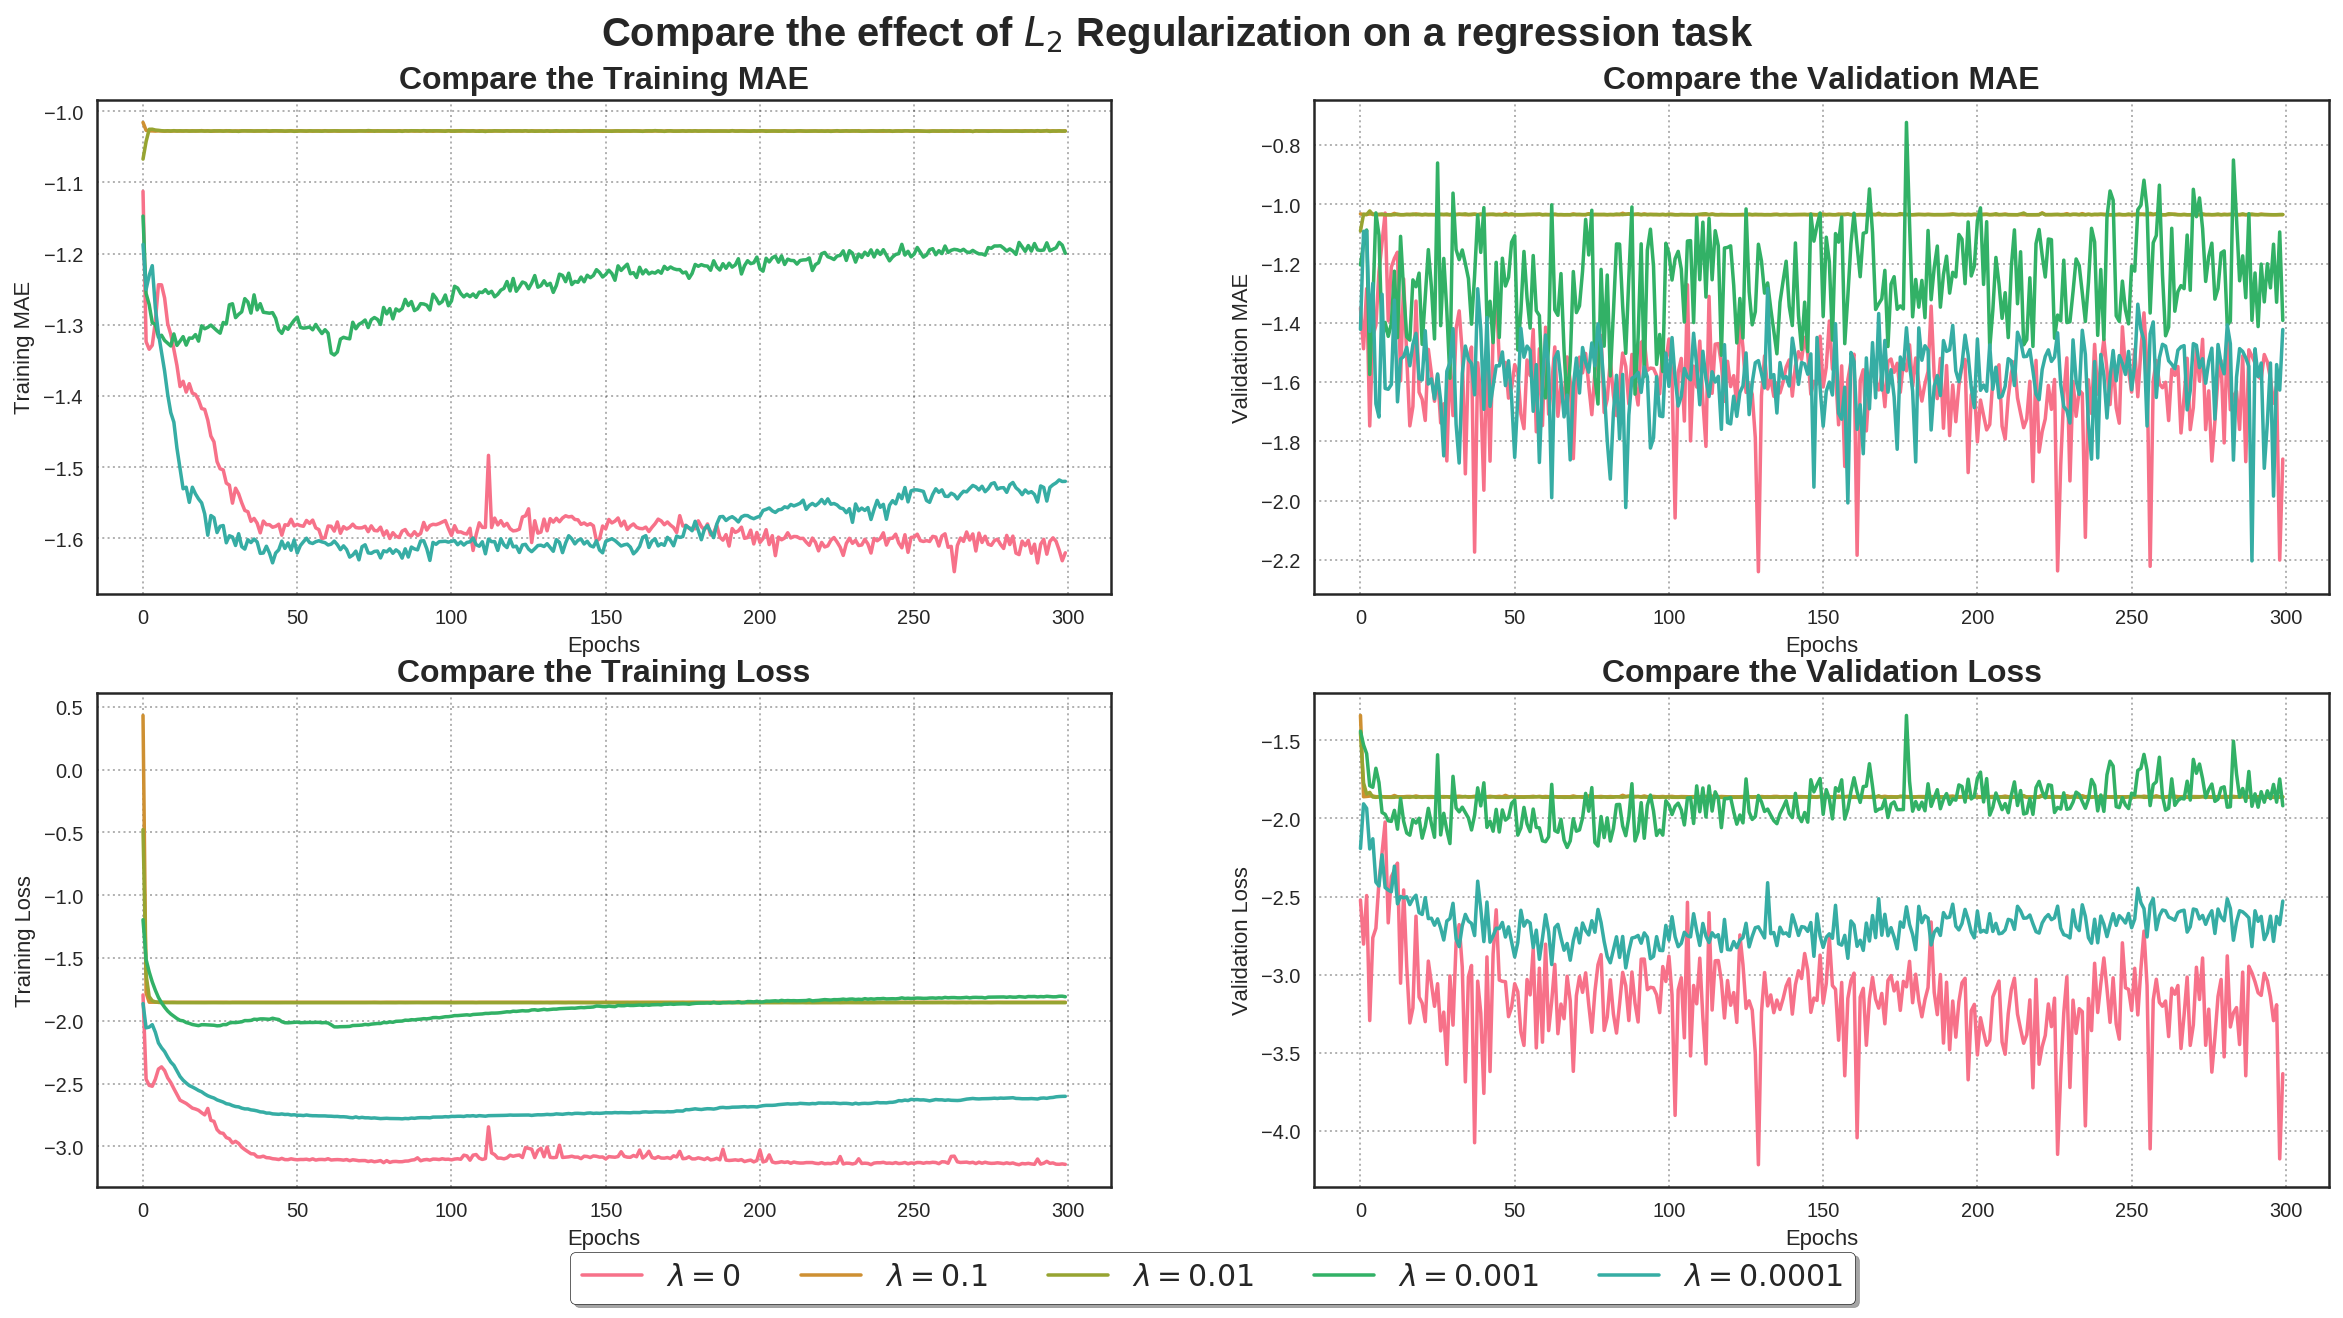

In [34]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))

ax1.plot(np.log10(model_1.history.history['mean_absolute_error']),color=colors[0],label='$\lambda=0$')
ax1.plot(np.log10(model_2.history.history['mean_absolute_error']),color=colors[1],label='$\lambda=0.1$')
ax1.plot(np.log10(model_3.history.history['mean_absolute_error']),color=colors[2],label='$\lambda=0.01$')
ax1.plot(np.log10(model_4.history.history['mean_absolute_error']),color=colors[3],label='$\lambda=0.001$')
ax1.plot(np.log10(model_5.history.history['mean_absolute_error']),color=colors[4],label='$\lambda=0.0001$')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training MAE')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training MAE',fontsize=16, fontweight='bold')


ax2.plot(np.log10(model_1.history.history['val_mean_absolute_error']),color=colors[0],label='$\lambda=0$')
ax2.plot(np.log10(model_2.history.history['val_mean_absolute_error']),color=colors[1],label='$\lambda=0.1$')
ax2.plot(np.log10(model_3.history.history['val_mean_absolute_error']),color=colors[2],label='$\lambda=0.01$')
ax2.plot(np.log10(model_4.history.history['val_mean_absolute_error']),color=colors[3],label='$\lambda=0.001$')
ax2.plot(np.log10(model_5.history.history['val_mean_absolute_error']),color=colors[4],label='$\lambda=0.0001$')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation MAE')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Validation MAE',fontsize=16, fontweight='bold')

ax3.plot(np.log10(model_1.history.history['loss']),color=colors[0],label='$\lambda=0$')
ax3.plot(np.log10(model_2.history.history['loss']),color=colors[1],label='$\lambda=0.1$')
ax3.plot(np.log10(model_3.history.history['loss']),color=colors[2],label='$\lambda=0.01$')
ax3.plot(np.log10(model_4.history.history['loss']),color=colors[3],label='$\lambda=0.001$')
ax3.plot(np.log10(model_5.history.history['loss']),color=colors[4],label='$\lambda=0.0001$')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=16, fontweight='bold')


ax4.plot(np.log10(model_1.history.history['val_loss']),color=colors[0],label='$\lambda=0$')
ax4.plot(np.log10(model_2.history.history['val_loss']),color=colors[1],label='$\lambda=0.1$')
ax4.plot(np.log10(model_3.history.history['val_loss']),color=colors[2],label='$\lambda=0.01$')
ax4.plot(np.log10(model_4.history.history['val_loss']),color=colors[3],label='$\lambda=0.001$')
ax4.plot(np.log10(model_5.history.history['val_loss']),color=colors[4],label='$\lambda=0.0001$')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Validation Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Validation Loss',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1),
          ncol=5, fancybox=True, shadow=True, frameon=True,edgecolor='black',fontsize=15)
fig.suptitle('Compare the effect of $L_2$ Regularization on a regression task',fontsize=20, fontweight='bold',y=0.94)
plt.show()